# Installing Libraries

In [12]:
!pip install xgboost

# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
!pip install MultiColumnLabelEncoder
from MultiColumnLabelEncoder import MultiColumnLabelEncoder
from xgboost import XGBClassifier
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold


# Reading Dataset

In [14]:
df=pd.read_csv("dementia_dataset.csv")

# Data Preprocessing

In [15]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [16]:
df.sort_values(by=["Group"])

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
295,OAS2_0144,OAS2_0144_MR1,Converted,1,0,M,R,77,16,1.0,30.0,0.0,1704,0.716,1.030
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,OAS1_0120,OAS1_0120_MR1,Nondemented,2,1510,M,R,70,8,4.0,26.0,0.5,1796,0.736,0.977
480,OAS1_0115,OAS1_0115_MR1,Nondemented,1,0,M,R,72,5,1.0,26.0,0.5,1911,0.726,0.919
476,OAS1_0111,OAS1_0111_MR1,Nondemented,2,395,M,R,23,7,4.0,30.0,0.5,1711,0.855,1.025
472,OAS1_0107,OAS1_0107_MR1,Nondemented,3,647,M,R,20,2,1.0,19.0,0.5,1733,0.853,1.013


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2668\1095973914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


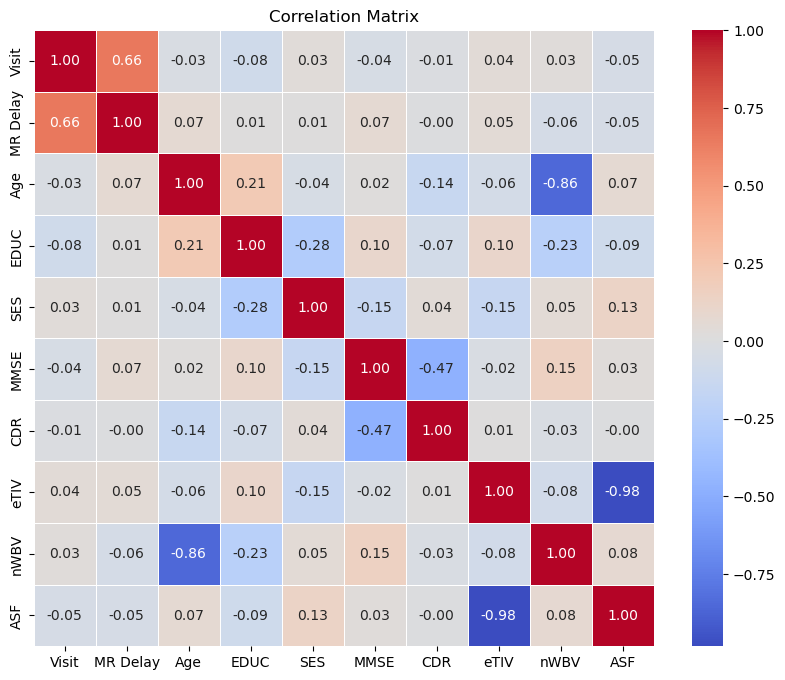

In [17]:
correlation_matrix = df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

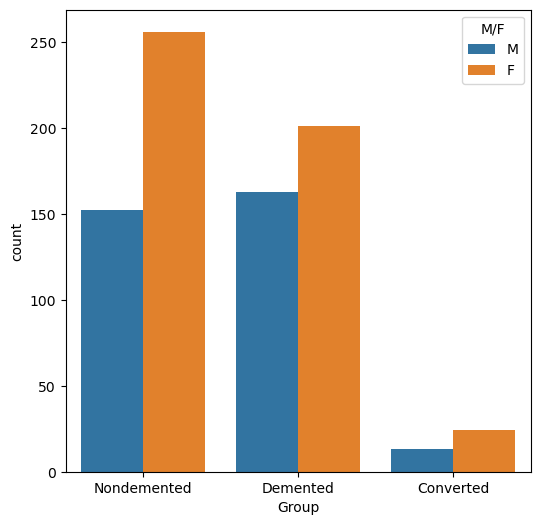

In [18]:
pyplot.figure ( figsize= (6,6) )
sns.countplot ( x = "Group", hue="M/F", data = df )
pyplot.show()

In [19]:
df.drop(["Subject ID", "MRI ID"], axis=1, inplace=True)

In [20]:
df.sort_values(by=["Group"])

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
295,Converted,1,0,M,R,77,16,1.0,30.0,0.0,1704,0.716,1.030
35,Converted,4,1933,F,R,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,Converted,1,0,M,R,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,Converted,2,756,M,R,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,Converted,3,1563,M,R,84,20,1.0,26.0,0.5,1597,0.666,1.099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,Nondemented,2,1510,M,R,70,8,4.0,26.0,0.5,1796,0.736,0.977
480,Nondemented,1,0,M,R,72,5,1.0,26.0,0.5,1911,0.726,0.919
476,Nondemented,2,395,M,R,23,7,4.0,30.0,0.5,1711,0.855,1.025
472,Nondemented,3,647,M,R,20,2,1.0,19.0,0.5,1733,0.853,1.013


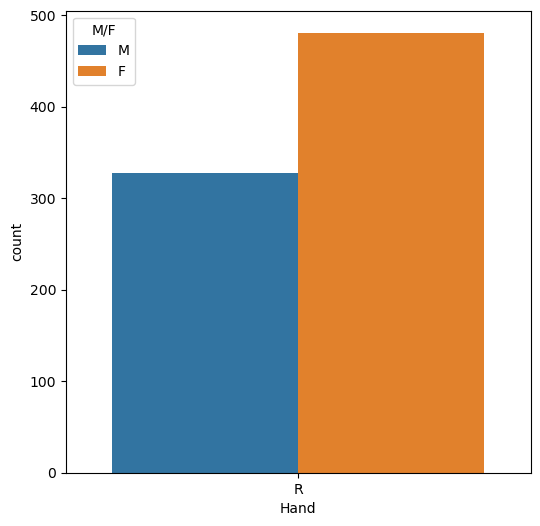

In [21]:
pyplot.figure ( figsize= (6,6) )
sns.countplot ( x = "Hand", hue="M/F", data = df )
pyplot.show()

In [22]:
df.drop(["Hand"], axis=1, inplace=True)

In [23]:
df.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [24]:
df.isnull().values.any()

True

In [25]:
column_names = list(df.columns.values)
def check_nan(column_names):
    for column in column_names:
        print("column: {0} --> {1}".format(column, df[column].isnull().sum()))

check_nan(column_names)

column: Group --> 0
column: Visit --> 0
column: MR Delay --> 0
column: M/F --> 0
column: Age --> 0
column: EDUC --> 0
column: SES --> 19
column: MMSE --> 2
column: CDR --> 0
column: eTIV --> 0
column: nWBV --> 0
column: ASF --> 0


In [26]:
df.fillna(0,inplace=True)

In [27]:
df.isnull().values.any()

False

In [28]:
X = df.iloc[:, 1:]
X

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,M,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,2,560,M,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,3,1895,M,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
804,3,2,M,20,5,2.0,24.0,0.0,1469,0.847,1.195
805,4,40,M,22,1,4.0,29.0,0.0,1684,0.790,1.042
806,5,89,M,22,7,3.0,17.0,0.5,1580,0.856,1.111
807,7,2,F,20,5,2.0,16.0,1.0,1262,0.861,1.390


In [29]:
y = df.iloc[:,0]
y

0      Nondemented
1      Nondemented
2         Demented
3         Demented
4         Demented
          ...     
804       Demented
805       Demented
806    Nondemented
807    Nondemented
808       Demented
Name: Group, Length: 809, dtype: object

In [30]:
Mcle =MultiColumnLabelEncoder()
encoded_x = Mcle.fit_transform(X)
encoded_x

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,0,75,12,0.0,23.0,0.5,1678,0.736,1.046
3,2,560,0,76,12,0.0,28.0,0.5,1738,0.713,1.010
4,3,1895,0,80,12,0.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
804,3,2,0,20,5,2.0,24.0,0.0,1469,0.847,1.195
805,4,40,0,22,1,4.0,29.0,0.0,1684,0.790,1.042
806,5,89,0,22,7,3.0,17.0,0.5,1580,0.856,1.111
807,7,2,1,20,5,2.0,16.0,1.0,1262,0.861,1.390


In [31]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

array([2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1,

# Train-Test Split

In [32]:
seed = 0
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size = test_size,
                                                    random_state = seed)
eval_set = [(X_train, y_train), (X_test, y_test)]

# Model Building

In [33]:
model = XGBClassifier(max_depth = 2, n_estimators = 50, learning_rate = 0.1, subsample = 0.8, colsample_bytree = 0.8, colsample_bylevel = 0.7)

In [34]:
model.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric = ["merror", "mlogloss"],eval_set = eval_set, verbose = True)

[0]	validation_0-merror:0.45192	validation_0-mlogloss:1.06759	validation_1-merror:0.51852	validation_1-mlogloss:1.06715
[1]	validation_0-merror:0.25137	validation_0-mlogloss:1.02270	validation_1-merror:0.14815	validation_1-mlogloss:1.01654
[2]	validation_0-merror:0.26236	validation_0-mlogloss:0.99828	validation_1-merror:0.19753	validation_1-mlogloss:0.99381
[3]	validation_0-merror:0.25412	validation_0-mlogloss:0.97478	validation_1-merror:0.18519	validation_1-mlogloss:0.96926
[4]	validation_0-merror:0.28846	validation_0-mlogloss:0.95398	validation_1-merror:0.24691	validation_1-mlogloss:0.94908
[5]	validation_0-merror:0.29396	validation_0-mlogloss:0.93406	validation_1-merror:0.25926	validation_1-mlogloss:0.92859
[6]	validation_0-merror:0.28709	validation_0-mlogloss:0.91364	validation_1-merror:0.22222	validation_1-mlogloss:0.90565
[7]	validation_0-merror:0.27610	validation_0-mlogloss:0.89850	validation_1-merror:0.23457	validation_1-mlogloss:0.89172
[8]	validation_0-merror:0.27747	validati

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-merror:0.24588	validation_0-mlogloss:0.73387	validation_1-merror:0.19753	validation_1-mlogloss:0.72466
[22]	validation_0-merror:0.24313	validation_0-mlogloss:0.72046	validation_1-merror:0.18519	validation_1-mlogloss:0.71145
[23]	validation_0-merror:0.23901	validation_0-mlogloss:0.71487	validation_1-merror:0.18519	validation_1-mlogloss:0.70571
[24]	validation_0-merror:0.16621	validation_0-mlogloss:0.68775	validation_1-merror:0.12346	validation_1-mlogloss:0.67504
[25]	validation_0-merror:0.16071	validation_0-mlogloss:0.67448	validation_1-merror:0.11111	validation_1-mlogloss:0.66155
[26]	validation_0-merror:0.15659	validation_0-mlogloss:0.67087	validation_1-merror:0.11111	validation_1-mlogloss:0.65787
[27]	validation_0-merror:0.16209	validation_0-mlogloss:0.66433	validation_1-merror:0.11111	validation_1-mlogloss:0.65104
[28]	validation_0-merror:0.16896	validation_0-mlogloss:0.66076	validation_1-merror:0.11111	validation_1-mlogloss:0.64799
[29]	validation_0-merror:0.17582

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

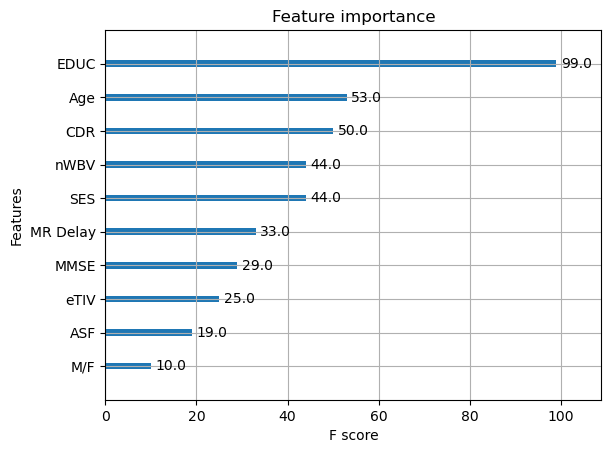

In [35]:
plot_importance(model)
pyplot.show()

In [36]:
Kfold = KFold(n_splits =10)
results_K = cross_val_score(model, encoded_x, encoded_y, cv = Kfold)
print("KFold - Accuracy: {0}% ".format(results_K.mean()*100))

KFold - Accuracy: 83.93672839506172% 


# Model Evaluation

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Accuracy: 0.9135802469135802

 Loss: 0.5456770565770157

 Precision: 0.9043775154886264

 Recall: 0.9135802469135802


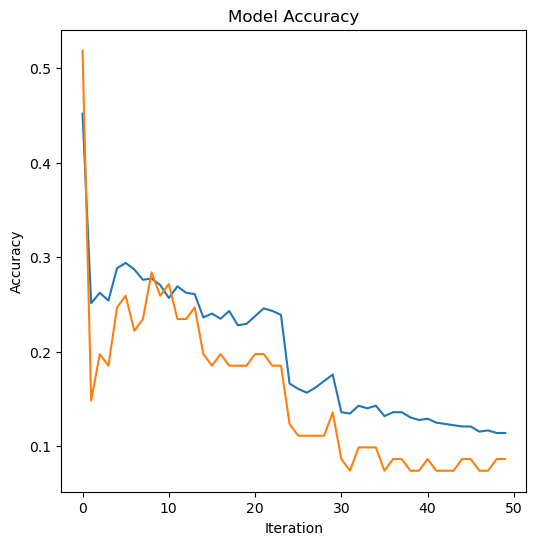

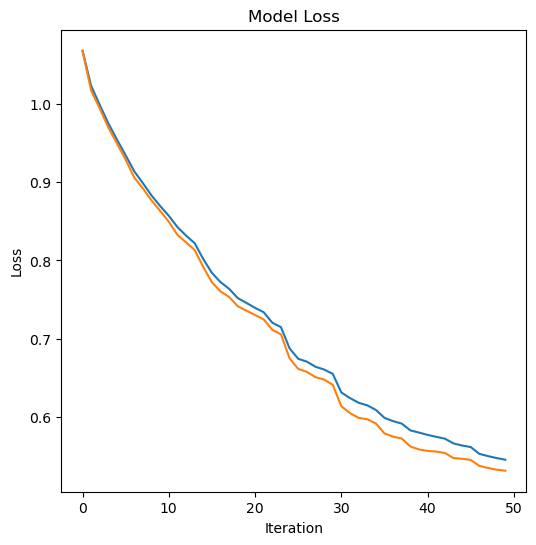

In [38]:
# prompt: code to find model accuracy ,model loss,precision ,recall,f1 score with their respective plots
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Calculate accuracy, loss, precision, recall, and f1 score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
loss = model.evals_result()['validation_0']['mlogloss'][-1]


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
#f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(" Accuracy:", accuracy)
print("\n Loss:", loss)
print("\n Precision:", precision)
print("\n Recall:", recall)
#print("\n F1 Score:", f1_score)

# Plot the metrics
# Plot accuracy
pyplot.figure(figsize=(6, 6))
pyplot.plot(model.evals_result()['validation_0']['merror'])
pyplot.plot(model.evals_result()['validation_1']['merror'])
pyplot.xlabel('Iteration')
pyplot.ylabel('Accuracy')
pyplot.title('Model Accuracy')
pyplot.show()
print("\n")

# Plot loss
pyplot.figure(figsize=(6, 6))
pyplot.plot(model.evals_result()['validation_0']['mlogloss'])
pyplot.plot(model.evals_result()['validation_1']['mlogloss'])
pyplot.xlabel('Iteration')
pyplot.ylabel('Loss')
pyplot.title('Model Loss')
pyplot.show()




In [39]:
cm = confusion_matrix(y_test, y_pred)

Text(58.222222222222214, 0.5, 'Truth')

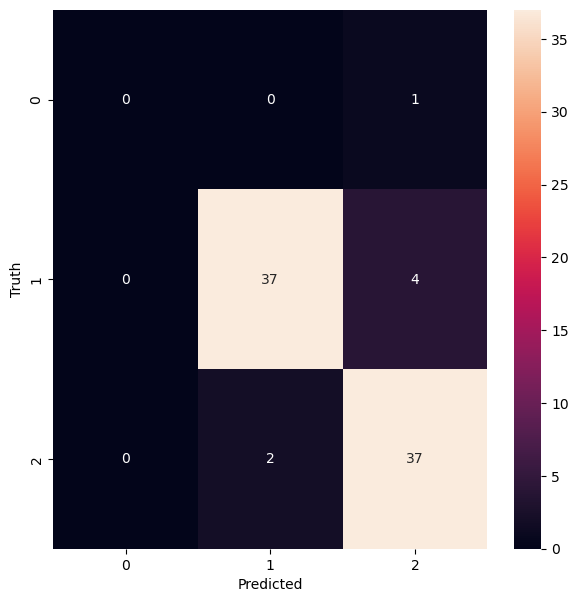

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
import pickle 

pickle.dump(model, open('xgboost.pkl','wb'))

m = pickle.load(open('xgboost.pkl','rb'))